In [10]:
print("hello")

hello


In [11]:
import numpy as np
import pandas as pd
import os


In [12]:
import os
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}

for dirname, _, filenames in os.walk("D:\\major_phase2\\archive\\processed_images"):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train//cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train//normal" in path:
            image_paths["train_normal"].append(path)
        elif "test//cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test//normal" in path:
            image_paths["test_normal"].append(path)

In [13]:
len(image_paths["train_normal"])

0

In [14]:
import os
for dirname, _, filenames in os.walk("D:\\major_phase2\\archive\\processed_images"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\major_phase2\archive\processed_images\test\cataract\image_246.png
D:\major_phase2\archive\processed_images\test\cataract\image_247.png
D:\major_phase2\archive\processed_images\test\cataract\image_248.png
D:\major_phase2\archive\processed_images\test\cataract\image_249.png
D:\major_phase2\archive\processed_images\test\cataract\image_250.png
D:\major_phase2\archive\processed_images\test\cataract\image_251.png
D:\major_phase2\archive\processed_images\test\cataract\image_252.png
D:\major_phase2\archive\processed_images\test\cataract\image_253.png
D:\major_phase2\archive\processed_images\test\cataract\image_254.png
D:\major_phase2\archive\processed_images\test\cataract\image_255.png
D:\major_phase2\archive\processed_images\test\cataract\image_256.png
D:\major_phase2\archive\processed_images\test\cataract\image_257.png
D:\major_phase2\archive\processed_images\test\cataract\image_258.png
D:\major_phase2\archive\processed_images\test\cataract\image_259.png
D:\major_phase2\archive\processed_

In [15]:
import os
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}

for dirname, _, filenames in os.walk("D:\\major_phase2\\archive\\processed_images"):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [16]:
len(image_paths["train_normal"])

246

In [17]:
from PIL import Image
from matplotlib import pyplot as plt

size of image : (381, 312, 3)


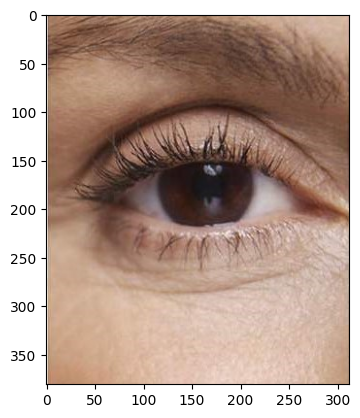

In [18]:
import numpy as np
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (800, 1200, 3)


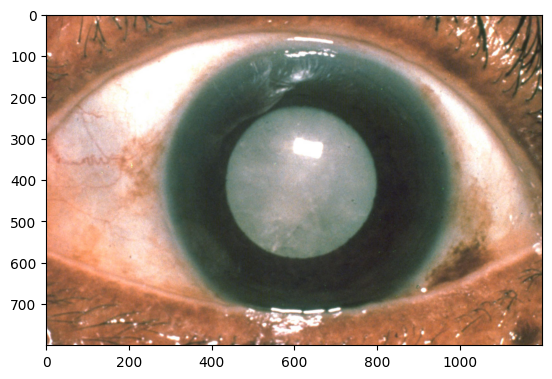

In [110]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [19]:
training_dir = "D:\\major_phase2\\archive\\processed_images\\train"
image_size = (55, 94, 3)
target_size = (55, 94)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 491 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop

In [42]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
    #Dense(2, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 53, 92, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 46, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 44, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 8448)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [44]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [45]:
history = model.fit_generator(
    train_generator,
    epochs=15
)

C:\Users\HP\AppData\Local\Temp\ipykernel_13256\322193820.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
16/16 [==============================] - 31s 2s/step - loss: 0.7873 - accuracy: 0.6008
Epoch 2/15
16/16 [==============================] - 14s 863ms/step - loss: 0.5067 - accuracy: 0.7923
Epoch 3/15
16/16 [==============================] - 13s 862ms/step - loss: 0.5143 - accuracy: 0.7617
Epoch 4/15
16/16 [==============================] - 13s 829ms/step - loss: 0.3998 - accuracy: 0.8371
Epoch 5/15
16/16 [==============================] - 14s 853ms/step - loss: 0.3592 - accuracy: 0.8493
Epoch 6/15
16/16 [==============================] - 14s 850ms/step - loss: 0.3670 - accuracy: 0.8554
Epoch 7/15
16/16 [==============================] - 15s 942ms/step - loss: 0.2803 - accuracy: 0.8859
Epoch 8/15
16/16 [==============================] - 14s 918ms/step - loss: 0.2663 - accuracy: 0.9022
Epoch 9/15
16/16 [==============================] - 13s 770ms/step - loss: 0.2669 - accuracy: 0.8941
Epoch 10/15
16/16 [==============================] - 13s 774ms/step - loss: 0.3286 - accuracy:

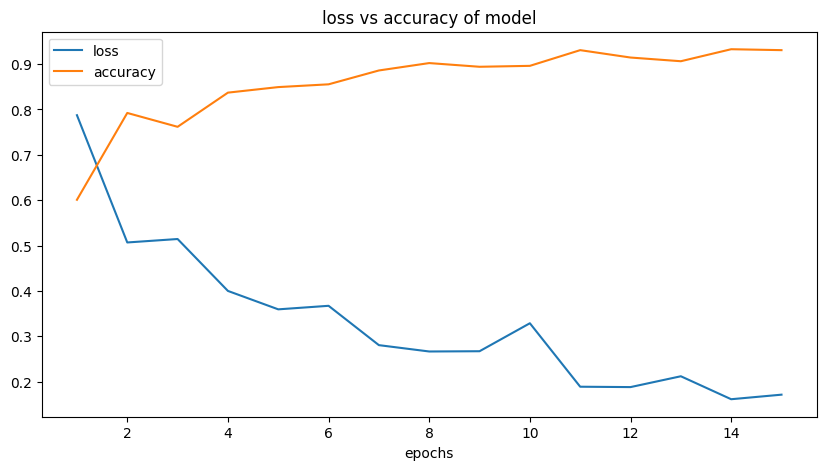

In [46]:
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [51]:
#import tensorflow as tf

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()


#with open('model.tflite', 'wb') as f:
 # f.write(tflite_model)

In [52]:
from keras.preprocessing import image
label = train_generator.class_indices
print(label)

{'cataract': 0, 'normal': 1}


1/1 [==============================] - 0s 151ms/step
actual class : normal
predicted class : normal
percentage: [1.]


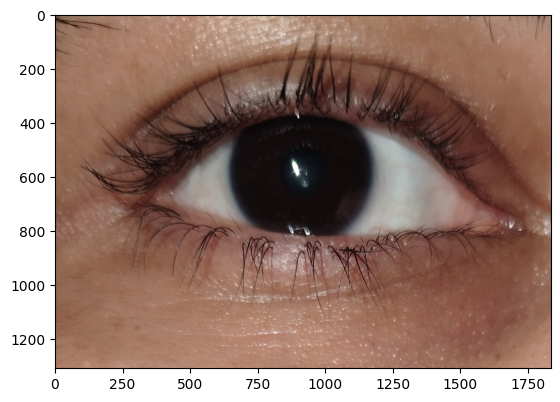

In [53]:
path = image_paths["test_normal"][60]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)

print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

print(f"percentage: {pred[0]}")

1/1 [==============================] - 0s 31ms/step
actual class : cataract
predicted class : cataract
percentage: [0.]


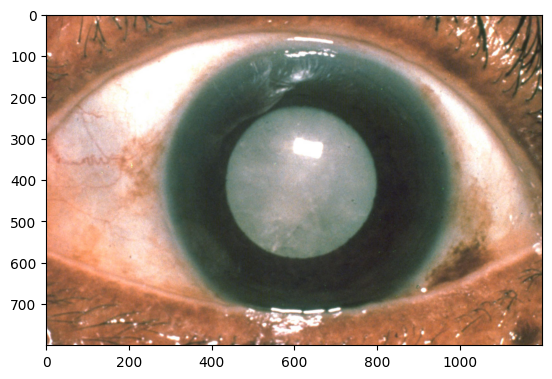

In [54]:
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)

print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

print(f"percentage: {pred[0]}")


In [55]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [ ]:
def _predict2(model2, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred2 = model2.predict(img)
    if pred2[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [56]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)
        
        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)
    
    return normal_pred, cataract_pred

In [57]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 20ms/step


In [58]:
import pandas as pd
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [59]:
pred_df.tail(20)

,relative_path,actual_class,predicted_class
102,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
103,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
104,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
105,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
106,D:\major_phase2\archive\processed_images\test\...,cataract,normal
107,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
108,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
109,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
110,D:\major_phase2\archive\processed_images\test\...,cataract,cataract
111,D:\major_phase2\archive\processed_images\test\...,cataract,cataract


In [60]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(pred_df['actual_class']), list(pred_df['predicted_class'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

In [61]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [62]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

In [63]:
evaluation_summary

,accuracy,precision,recall,f1
0,0.942623,0.95082,0.935484,0.943089


In [71]:
#model.save("saved.h5")